In [ ]:
import geopandas as gpd
import hvplot.pandas
import numpy as np
import pandas as pd
import panel as pn
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import geojson
import simplejson as json
from bokeh.resources import INLINE
from bokeh.models import Slider
from IPython.display import HTML

# Initialize Panel with extensions
pn.extension('plotly', design='material')

# Reload the dataframe
df = pd.read_excel("/content/cyberyoyo.xlsx")
df = df.dropna(subset=['latitude', 'longitude'])
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
print(df.info())
countries = df['Country'].unique().tolist()
country_selector = pn.widgets.Select(name='Country', options=countries)

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            161 non-null    object 
 1   City               158 non-null    object 
 2   State              94 non-null     object 
 3   Country            157 non-null    object 
 4   latitude           161 non-null    float64
 5   longitude          161 non-null    float64
 6   Year               161 non-null    float64
 7   Organization_type  161 non-null    object 
 8   Method             161 non-null    object 
 9   type               161 non-null    object 
dtypes: float64(3), object(7)
memory usage: 13.8+ KB
None


In [ ]:
# Created first map for better understanding of dataset using city of lisbon as center

first_map = folium.Map(location = (38.7077507, -9.1365919), zoom_start=2, tiles="https://mt1.google.com/vt/lyrs=r&x={x}&y={y}&z={z}", attr="Google maps")
for i in range(0, len(df)):
  folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']], tooltip =df.iloc[i]['Method']).add_to(first_map)

first_map

In [ ]:
# Created intractive map using mapbox studio
mapbox_user = 'taannii'
mapbox_token = 'pk.eyJ1IjoidGFhbm5paSIsImEiOiJjbHRpc2lpaDMwZnQyMmtzNGx1ZHdveGo5In0.VXDos6U1ozgeanQOkNi0-A'
style_id ='clvqhtnyt00hi01qu0ktd6ga1'

tiles = 'https://api.mapbox.com/styles/v1/'+mapbox_user+'/'+style_id+'/tiles/256/{z}/{x}/{y}?access_token='+mapbox_token
second_map = folium.Map(location=[40.730610, -73.935242], zoom_start=2,
               tiles=tiles,
               attr='Mapbox')
second_map

In [ ]:
# Function to create a map centered on the selected country
def create_folium_map(data):
    # Calculate the mean latitude and longitude to center the map
    center_lat = data['latitude'].mean()
    center_lon = data['longitude'].mean()

    folium_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

    # Use a MarkerCluster to add markers for each event
    marker_cluster = MarkerCluster().add_to(folium_map)

    # Add a marker for each event
    for idx, row in data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"<br>Attack type: {row['type']}",
            icon=folium.Icon(color="red", prefix='fa', icon="bug"),
            tooltip =row['Method']
        ).add_to(marker_cluster)

    # Return the Folium map object
    return folium_map


def update_map(df, country, width, height):
    # Filter the DataFrame for the selected country
    country = country_selector.value
    data = df[df['Country'] == country].copy()
    folium_map = create_folium_map(data)
    return pn.pane.HTML(folium_map._repr_html_(), width=700, height=500)


In [ ]:
width = 700
height = 500
map_pane = pn.bind(update_map, df,  country_selector.param.value, width, height)
zoom_slider = Slider(start=1, end=18, value=4, step=1, title="Zoom Level")
#zoom_slider.param.watch(update_map, 'value')
# Dashboard layout
dashboard = pn.Column(
    pn.Row(country_selector, zoom_slider),
    map_pane
)

dashboard.save('/content/dashboard.html', embed=True, resources=INLINE)




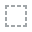
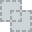
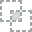
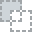
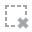
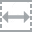
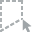
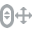
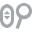
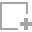
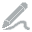
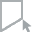
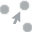
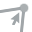
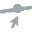

In [ ]:

# Assuming 'example.html' is your HTML file
with open('/content/dashboard.html', 'r') as file:
    html_content = file.read()

# Display the HTML content in the notebook
HTML(html_content)

In [ ]:

# Final map inculing widgets and dashboard
dashboard.servable()

Column(design=<class 'panel.theme.materi...)
    [0] Row(design=<class 'panel.theme.materi...)
        [0] Select(design=<class 'panel.theme.materi..., name='Country', options=['United States', ...], value='United States')
        [1] Bokeh(Slider, design=<class 'panel.theme.materi...)
    [1] ParamFunction(function, _pane=HTML, defer_load=False, design=<class 'panel.theme.materi...)